**DSA210 PROJECT**

In [43]:
import matplotlib.pyplot as plt
import numpy as np


**Spotify Data**

In [46]:
from google.colab import files
import pandas as pd

streamData1=pd.read_json("Streaming_History_Audio_2024-2025_2.json")
streamData2=pd.read_json("Streaming_History_Audio_2022-2024_1.json")

streamDataAll=pd.concat([streamData1,streamData2])

streamDataAll = streamDataAll.drop(['platform', 'conn_country', 'ip_addr', 'master_metadata_album_album_name',
                                    'episode_name', 'episode_show_name', 'spotify_episode_uri', 'audiobook_title',
                                    'audiobook_uri', 'audiobook_chapter_uri', 'audiobook_chapter_title', 'reason_start',
                                    'reason_end','shuffle', 'offline', 'incognito_mode', 'skipped'], axis=1)

streamDataAll['minutes_played'] = streamDataAll['ms_played'] / 60000
streamDataAll = streamDataAll.drop(['ms_played'], axis=1)

missing_count = streamDataAll['spotify_track_uri'].isna().sum()
print(f"Number of missing 'spotify_track_uri': {missing_count}")

streamDataAll = streamDataAll.dropna(subset=['spotify_track_uri'])
# Reset the index after dropping rows
streamDataAll.reset_index(drop=True, inplace=True)

#verify
missing_count = streamDataAll['spotify_track_uri'].isna().sum()
print(f"Number of missing 'spotify_track_uri': {missing_count}")

streamDataAll['date'] = pd.to_datetime(streamDataAll['ts'])
print(streamDataAll.head())

min_date = streamDataAll['date'].min()
max_date = streamDataAll['date'].max()

print(f"Start date of the data: {min_date}")
print(f"End date of the data: {max_date}")


Number of missing 'spotify_track_uri': 15
Number of missing 'spotify_track_uri': 0
                     ts master_metadata_track_name  \
0  2024-10-27T09:12:47Z          Are You All Good?   
1  2024-10-27T09:13:04Z                 Impossible   
2  2024-10-27T09:19:08Z       Oscar Winning Tears.   
3  2024-10-27T09:22:56Z                   Hysteria   
4  2024-10-27T09:26:38Z            Until It's Gone   

  master_metadata_album_artist_name                     spotify_track_uri  \
0                          breathe.  spotify:track:6bmoA5by5aXQp5hG8cRbyW   
1                      James Arthur  spotify:track:6skGMlljk0s5yeBKZ7sN5n   
2                              RAYE  spotify:track:0iO2iCAjtX0t5duvczNQt6   
3                              Muse  spotify:track:0knbMPVHpFbsx38pLoYSRs   
4                       Linkin Park  spotify:track:2n1jBz26dVBtSbMvJNjGsu   

   offline_timestamp  minutes_played                      date  
0       1.730020e+09        3.199567 2024-10-27 09:12:47+00:00  

**Number of Songs Played by Month**

<ipython-input-45-b2d7c903be33>:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  streamDataGroupedByMonth = streamDataAll.groupby(streamDataAll['date'].dt.to_period("M")).size().reset_index(name='song_count')


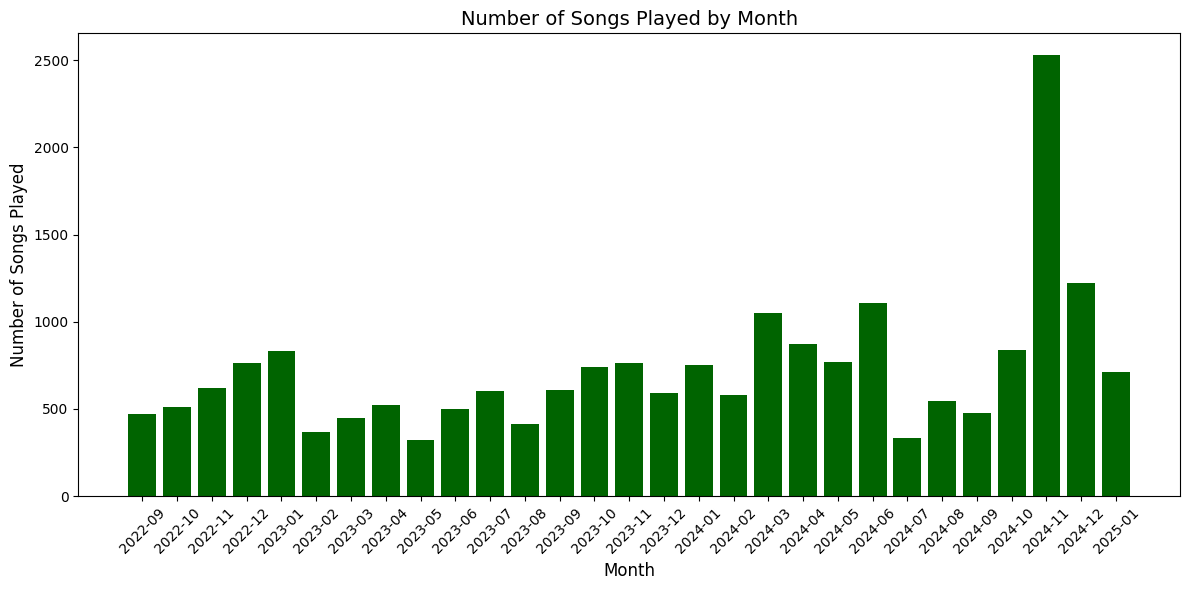

In [45]:
streamDataGroupedByMonth = streamDataAll.groupby(streamDataAll['date'].dt.to_period("M")).size().reset_index(name='song_count')
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(streamDataGroupedByMonth['date'].astype(str), streamDataGroupedByMonth['song_count'], color='#006400')

# Add labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Songs Played', fontsize=12)
plt.title('Number of Songs Played by Month', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


**Number of Songs Played by Hour of Day**

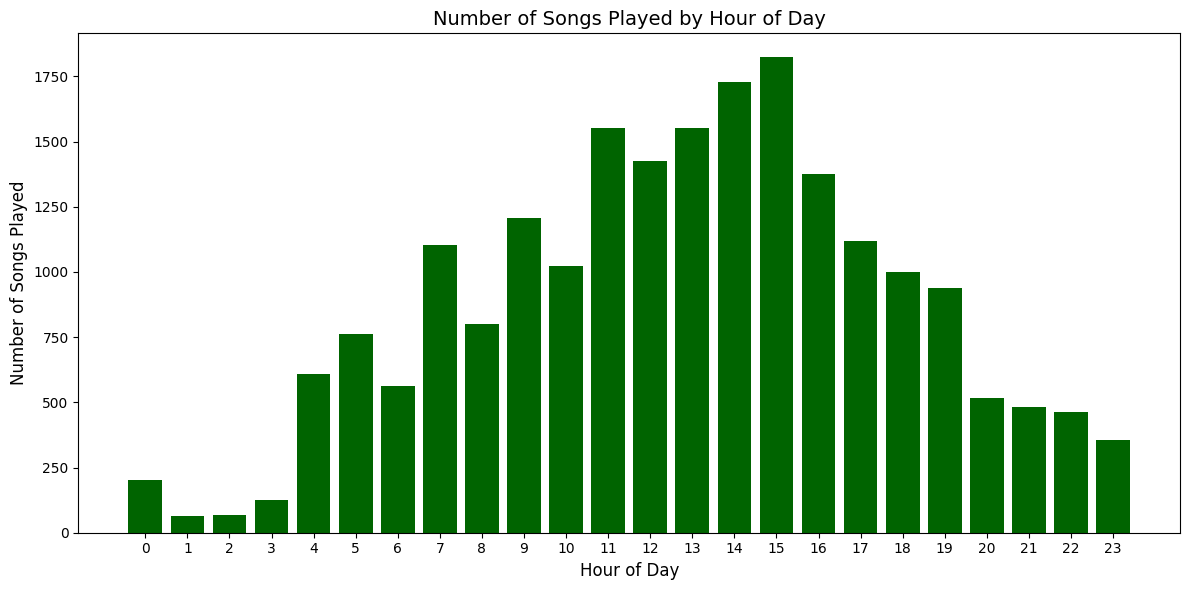

In [152]:
# Extract the hour from the 'date' column
streamDataAll['hour'] = streamDataAll['date'].dt.hour

# Group by hour and count the number of songs
streamDataGroupedByHour = streamDataAll.groupby('hour').size().reset_index(name='song_count')

# Plot the data
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(streamDataGroupedByHour['hour'], streamDataGroupedByHour['song_count'], color='#006400')

# Add labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Songs Played', fontsize=12)
plt.title('Number of Songs Played by Hour of Day', fontsize=14)

# Customize the x-axis
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are shown

# Display the plot
plt.tight_layout()
plt.show()


**Getting Historical Weather Data**

In [58]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define the API URL and parameters
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/istanbul/2024-01-01/2024-12-30"
params = {
    "elements": "datetime,temp,tempmax,tempmin,precip",
    "unitGroup": "metric",  # Metric units
    "key": "3DP2MTA652T4GZGW36RM2PP4V",  # Your API key
    "include": "days",
    "contentType": "json"
}

# Request data from the API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Process the data
    processed_data = []
    for day in data.get("days", []):
        processed_data.append({
            "date": day.get("datetime"),
            "avg_temp": day.get("temp"),
            "max_temp": day.get("tempmax"),
            "min_temp": day.get("tempmin"),
            "precipitation": day.get("precip")
        })

    # Create a DataFrame
    df = pd.DataFrame(processed_data)
    print(df.head())

    # Save the DataFrame as a CSV file locally in Colab
    file_name = "weather_data.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved locally as '{file_name}'")
else:
    print(f"Error: {response.status_code}, {response.text}")


files.download("weather_data.csv")


         date  avg_temp  max_temp  min_temp  precipitation
0  2024-01-01      13.0      16.3      10.4          0.000
1  2024-01-02      12.4      14.5       9.0          5.226
2  2024-01-03      11.8      15.2       7.8          3.386
3  2024-01-04      13.4      15.5      11.1          0.207
4  2024-01-05      12.3      15.3       9.5          0.539
Data saved locally as 'weather_data.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/istanbul/2022-09-07/2023-06-01"
params = {
    "elements": "datetime,temp,tempmax,tempmin,precip",
    "unitGroup": "metric",  # Metric units
    "key": "L7FPWE3YDXPL258KAPZMK6GV6",  # Your API key
    "include": "days",
    "contentType": "json"
}

# Request data from the API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Process the data
    processed_data = []
    for day in data.get("days", []):
        processed_data.append({
            "date": day.get("datetime"),
            "avg_temp": day.get("temp"),
            "max_temp": day.get("tempmax"),
            "min_temp": day.get("tempmin"),
            "precipitation": day.get("precip")
        })

    # Create a DataFrame
    df = pd.DataFrame(processed_data)
    print(df.head())

    # Save the DataFrame as a CSV file locally in Colab
    file_name = "weather_data2.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved locally as '{file_name}'")
else:
    print(f"Error: {response.status_code}, {response.text}")


files.download("weather_data2.csv")

         date  avg_temp  max_temp  min_temp  precipitation
0  2022-09-07      22.2      24.3      19.9            0.0
1  2022-09-08      21.9      24.8      19.0            0.0
2  2022-09-09      22.3      25.1      18.3            0.0
3  2022-09-10      23.3      26.8      18.3            0.0
4  2022-09-11      23.9      26.4      21.2            0.0
Data saved locally as 'weather_data2.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/istanbul/2023-06-02/2023-12-31"
params = {
    "elements": "datetime,temp,tempmax,tempmin,precip",
    "unitGroup": "metric",  # Metric units
    "key": "NQ26GLYMMKUG3UGAPSB9JK4HA",  # Your API key
    "include": "days",
    "contentType": "json"
}

# Request data from the API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Process the data
    processed_data = []
    for day in data.get("days", []):
        processed_data.append({
            "date": day.get("datetime"),
            "avg_temp": day.get("temp"),
            "max_temp": day.get("tempmax"),
            "min_temp": day.get("tempmin"),
            "precipitation": day.get("precip")
        })

    # Create a DataFrame
    df = pd.DataFrame(processed_data)
    print(df.head())

    # Save the DataFrame as a CSV file locally in Colab
    file_name = "weather_data3.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved locally as '{file_name}'")
else:
    print(f"Error: {response.status_code}, {response.text}")


files.download("weather_data3.csv")

         date  avg_temp  max_temp  min_temp  precipitation
0  2023-06-02      20.8      23.9      16.9          0.000
1  2023-06-03      20.3      22.3      18.7          0.428
2  2023-06-04      18.9      19.8      17.4          7.572
3  2023-06-05      19.2      21.8      17.1          0.543
4  2023-06-06      19.8      22.4      16.9          0.000
Data saved locally as 'weather_data3.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
url = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/istanbul/2024-12-31/2025-01-05"
params = {
    "elements": "datetime,temp,tempmax,tempmin,precip",
    "unitGroup": "metric",  # Metric units
    "key": "B37NJUWZLNAMZPVT9UNJRBBKN",  # Your API key
    "include": "days",
    "contentType": "json"
}

# Request data from the API
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()

    # Process the data
    processed_data = []
    for day in data.get("days", []):
        processed_data.append({
            "date": day.get("datetime"),
            "avg_temp": day.get("temp"),
            "max_temp": day.get("tempmax"),
            "min_temp": day.get("tempmin"),
            "precipitation": day.get("precip")
        })

    # Create a DataFrame
    df = pd.DataFrame(processed_data)
    print(df.head())

    # Save the DataFrame as a CSV file locally in Colab
    file_name = "weather_data4.csv"
    df.to_csv(file_name, index=False)
    print(f"Data saved locally as '{file_name}'")
else:
    print(f"Error: {response.status_code}, {response.text}")


files.download("weather_data4.csv")

         date  avg_temp  max_temp  min_temp  precipitation
0  2024-12-31       6.8       9.8       4.4          0.000
1  2025-01-01       6.6      11.4       2.5          0.000
2  2025-01-02       8.8      12.3       4.5          0.000
3  2025-01-03      12.1      14.6       9.9          0.000
4  2025-01-04       9.5      12.8       6.3          3.446
Data saved locally as 'weather_data4.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Gathering all weather data in a single file

In [64]:
file_list = ["weather_data2.csv", "weather_data3.csv", "weather_data.csv", "weather_data4.csv"]

dataframes = [pd.read_csv(file) for file in file_list]
concatenated_df = pd.concat(dataframes, ignore_index=True)

# Check the concatenated data
print(concatenated_df.head())

colab_file_name = "concatenated_weather_data.csv"
concatenated_df.to_csv(colab_file_name, index=False)
print(f"File saved in Google Colab as: {colab_file_name}")

# Download the file to your local machine
files.download(colab_file_name)


         date  avg_temp  max_temp  min_temp  precipitation
0  2022-09-07      22.2      24.3      19.9            0.0
1  2022-09-08      21.9      24.8      19.0            0.0
2  2022-09-09      22.3      25.1      18.3            0.0
3  2022-09-10      23.3      26.8      18.3            0.0
4  2022-09-11      23.9      26.4      21.2            0.0
File saved in Google Colab as: concatenated_weather_data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Temperature Trends Visualization**

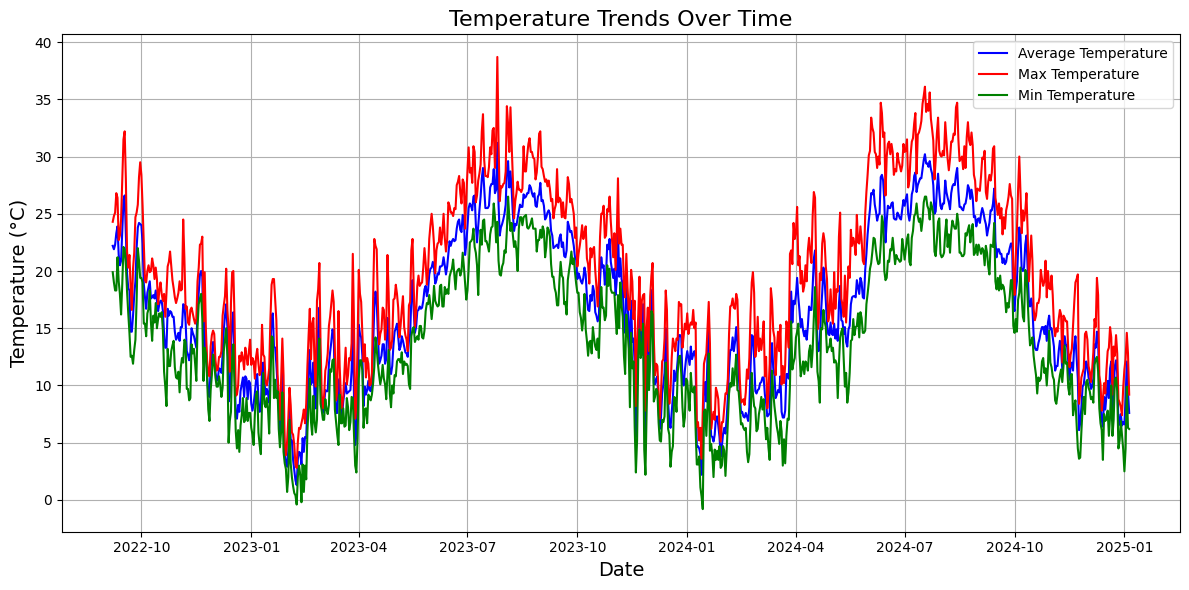

In [65]:
# Load the concatenated CSV file
file_name = "concatenated_weather_data.csv"
df = pd.read_csv(file_name)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['avg_temp'], label='Average Temperature', color='blue')
plt.plot(df['date'], df['max_temp'], label='Max Temperature', color='red')
plt.plot(df['date'], df['min_temp'], label='Min Temperature', color='green')

# Customize the plot
plt.title("Temperature Trends Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


**Merging Spotify Data and Weather Data (Temperature)**



In [68]:
spotify_data = streamDataAll.copy()  # Use your existing DataFrame
spotify_data['date'] = pd.to_datetime(spotify_data['date']).dt.date  # Extract only the date part

# Load the temperature data
temperature_data = pd.read_csv("concatenated_weather_data.csv")
temperature_data['date'] = pd.to_datetime(temperature_data['date']).dt.date  # Ensure the date format matches

# Merge Spotify data with temperature data on the date column (average temperature only)
merged_data = pd.merge(
    spotify_data,
    temperature_data[['date', 'avg_temp']],  # Only include the date and average temperature columns
    on='date',
    how='left'  # Use a left join to keep all Spotify data
)

# Check the merged DataFrame
print(merged_data.head())

# Save the merged data to a CSV file in Colab
colab_file_name = "spotify_with_avg_temperature.csv"
merged_data.to_csv(colab_file_name, index=False)
print(f"Merged data with average temperature saved to Colab as: {colab_file_name}")

# Download the file to your local machine
files.download(colab_file_name)


                     ts master_metadata_track_name  \
0  2024-10-27T09:12:47Z          Are You All Good?   
1  2024-10-27T09:13:04Z                 Impossible   
2  2024-10-27T09:19:08Z       Oscar Winning Tears.   
3  2024-10-27T09:22:56Z                   Hysteria   
4  2024-10-27T09:26:38Z            Until It's Gone   

  master_metadata_album_artist_name                     spotify_track_uri  \
0                          breathe.  spotify:track:6bmoA5by5aXQp5hG8cRbyW   
1                      James Arthur  spotify:track:6skGMlljk0s5yeBKZ7sN5n   
2                              RAYE  spotify:track:0iO2iCAjtX0t5duvczNQt6   
3                              Muse  spotify:track:0knbMPVHpFbsx38pLoYSRs   
4                       Linkin Park  spotify:track:2n1jBz26dVBtSbMvJNjGsu   

   offline_timestamp  minutes_played        date  avg_temp  
0       1.730020e+09        3.199567  2024-10-27      15.2  
1       1.730020e+09        0.263483  2024-10-27      15.2  
2       1.730020e+09        6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Average Number of Songs Played by Temperature**

<ipython-input-70-01e5d960b903>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_grouped = merged_data.groupby('temp_range').size().reset_index(name='num_songs')


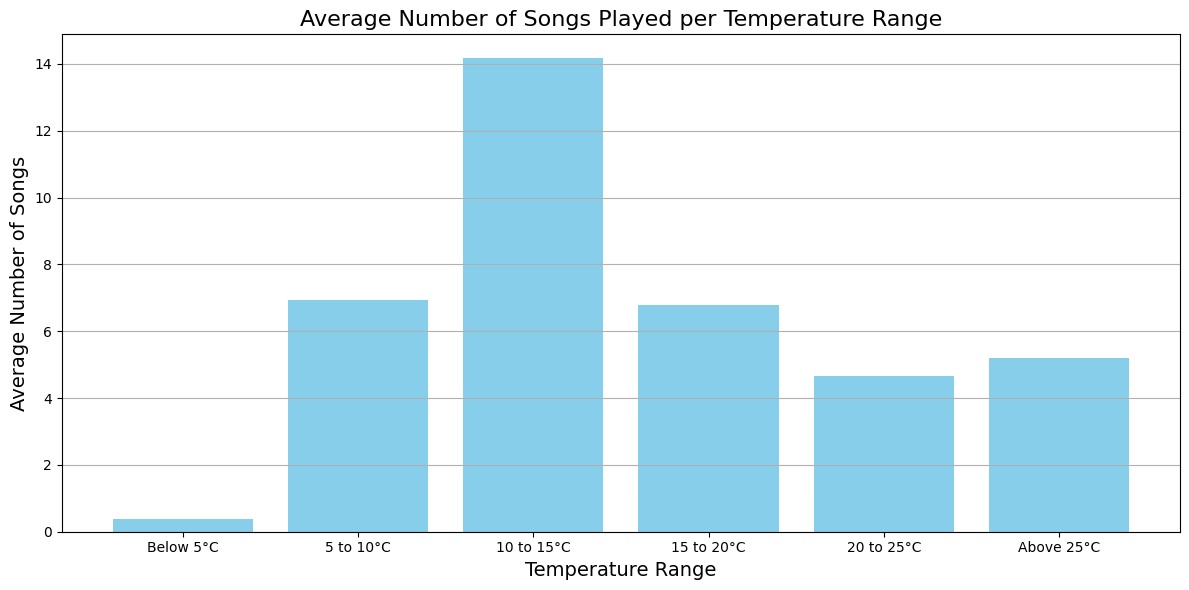

In [70]:
file_name = "spotify_with_avg_temperature.csv"
merged_data = pd.read_csv(file_name)

# Define custom temperature bins
bins = [-float('inf'), 5, 10, 15, 20, 25, float('inf')]  # Custom bins
labels = ['Below 5°C', '5 to 10°C', '10 to 15°C', '15 to 20°C', '20 to 25°C', 'Above 25°C']  # Labels

# Group data into the bins
merged_data['temp_range'] = pd.cut(merged_data['avg_temp'], bins=bins, labels=labels, include_lowest=True)

# Count songs for each temperature range
temp_grouped = merged_data.groupby('temp_range').size().reset_index(name='num_songs')

# Calculate average number of songs per temperature range
avg_songs_per_temp = temp_grouped['num_songs'] / len(merged_data['date'].unique())
temp_grouped['avg_songs_per_temp'] = avg_songs_per_temp

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(temp_grouped['temp_range'], temp_grouped['avg_songs_per_temp'], color='skyblue')
plt.title("Average Number of Songs Played per Temperature Range", fontsize=16)
plt.xlabel("Temperature Range", fontsize=14)
plt.ylabel("Average Number of Songs", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Average Number of Songs Played by Temperature (Continuous and with a line of best fit)**

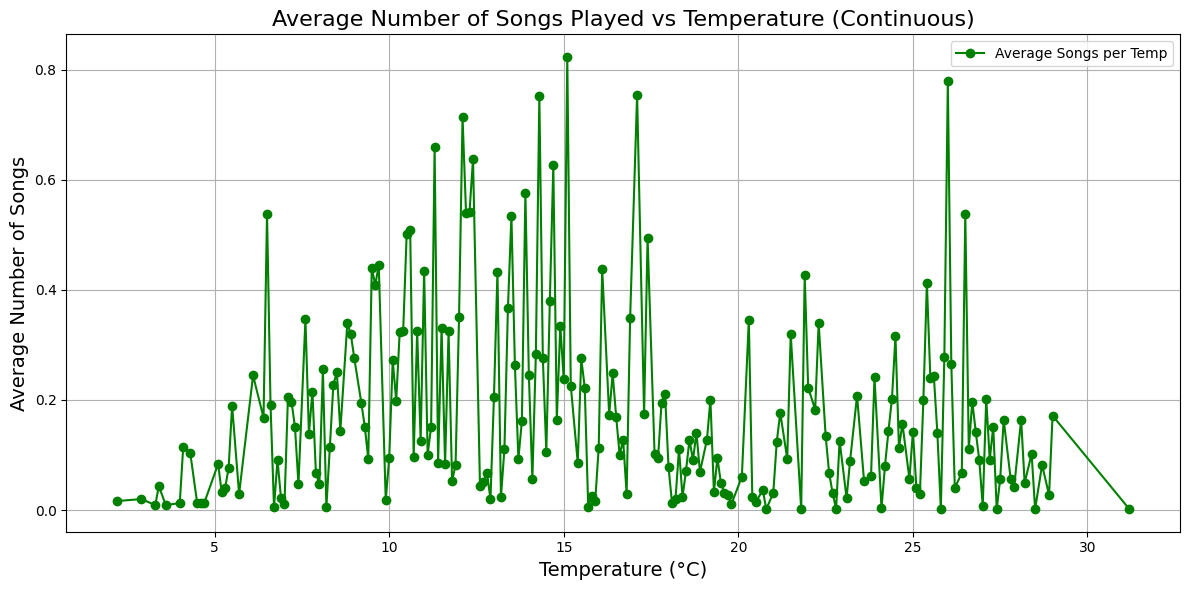

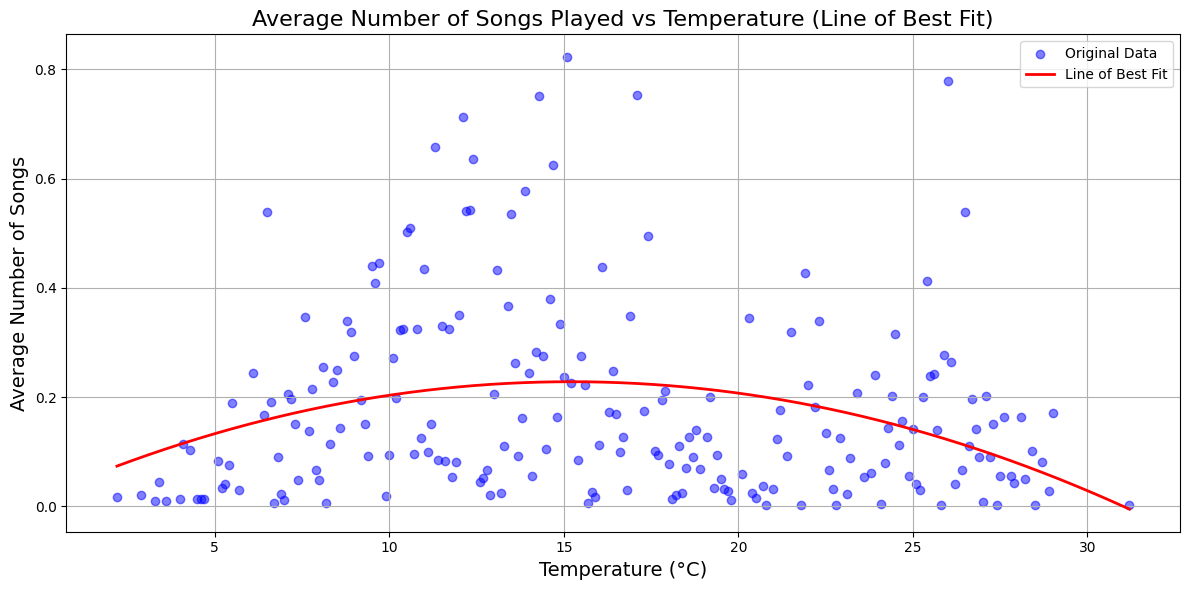

In [72]:
# Load the merged data
file_name = "spotify_with_avg_temperature.csv"
merged_data = pd.read_csv(file_name)

# Group by the exact average temperature
temp_grouped = merged_data.groupby('avg_temp').size().reset_index(name='num_songs')

# Calculate the average number of songs per temperature
temp_grouped['avg_songs_per_temp'] = temp_grouped['num_songs'] / len(merged_data['date'].unique())

# Sort the DataFrame by temperature for smooth plotting
temp_grouped = temp_grouped.sort_values(by='avg_temp')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(temp_grouped['avg_temp'], temp_grouped['avg_songs_per_temp'], marker='o', color='green', label='Average Songs per Temp')

# Customize the plot
plt.title("Average Number of Songs Played vs Temperature (Continuous)", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Average Number of Songs", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Fit a polynomial regression (degree 2 or higher for a curve)
x = temp_grouped['avg_temp']
y = temp_grouped['avg_songs_per_temp']
z = np.polyfit(x, y, 2)  # Fit a 2nd-degree polynomial
p = np.poly1d(z)

# Generate line of best fit
x_fit = np.linspace(x.min(), x.max(), 500)  # Smooth range for x
y_fit = p(x_fit)

# Plot the original data and the line of best fit
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Original Data', color='blue', alpha=0.5)  # Scatter plot of original data
plt.plot(x_fit, y_fit, label='Line of Best Fit', color='red', linewidth=2)  # Line of best fit

# Customize the plot
plt.title("Average Number of Songs Played vs Temperature (Line of Best Fit)", fontsize=16)
plt.xlabel("Temperature (°C)", fontsize=14)
plt.ylabel("Average Number of Songs", fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()



**Merging Spotify Data and Weather Data (Precipitation)**

In [172]:
# Copy the existing Spotify data
spotify_data = streamDataAll.copy()  # Use your existing DataFrame
spotify_data['date'] = pd.to_datetime(spotify_data['date']).dt.date  # Extract only the date part

# Load the weather data (precipitation data specifically)
weather_data = pd.read_csv("concatenated_weather_data.csv")
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.date  # Ensure the date format matches

# Merge Spotify data with precipitation data on the date column (average precipitation only)
merged_data = pd.merge(
    spotify_data,
    weather_data[['date', 'precipitation']],  # Only include the date and average precipitation columns
    on='date',
    how='left'  # Use a left join to keep all Spotify data
)

# Check the merged DataFrame
print(merged_data.head())

# Save the merged data to a CSV file in Colab
colab_file_name = "spotify_with_avg_precipitation.csv"
merged_data.to_csv(colab_file_name, index=False)
print(f"Merged data with average precipitation saved to Colab as: {colab_file_name}")

# Download the file to your local machine
#files.download(colab_file_name)

                     ts master_metadata_track_name  \
0  2024-10-27T09:12:47Z          Are You All Good?   
1  2024-10-27T09:13:04Z                 Impossible   
2  2024-10-27T09:19:08Z       Oscar Winning Tears.   
3  2024-10-27T09:22:56Z                   Hysteria   
4  2024-10-27T09:26:38Z            Until It's Gone   

  master_metadata_album_artist_name                     spotify_track_uri  \
0                          breathe.  spotify:track:6bmoA5by5aXQp5hG8cRbyW   
1                      James Arthur  spotify:track:6skGMlljk0s5yeBKZ7sN5n   
2                              RAYE  spotify:track:0iO2iCAjtX0t5duvczNQt6   
3                              Muse  spotify:track:0knbMPVHpFbsx38pLoYSRs   
4                       Linkin Park  spotify:track:2n1jBz26dVBtSbMvJNjGsu   

   offline_timestamp  minutes_played        date  hour  precipitation  
0       1.730020e+09        3.199567  2024-10-27     9            0.0  
1       1.730020e+09        0.263483  2024-10-27     9            0.

**Average Number of Songs Played by Precipitation**

<ipython-input-176-d4e8703c738a>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_grouped = merged_data.groupby('precip_range').size().reset_index(name='num_songs')


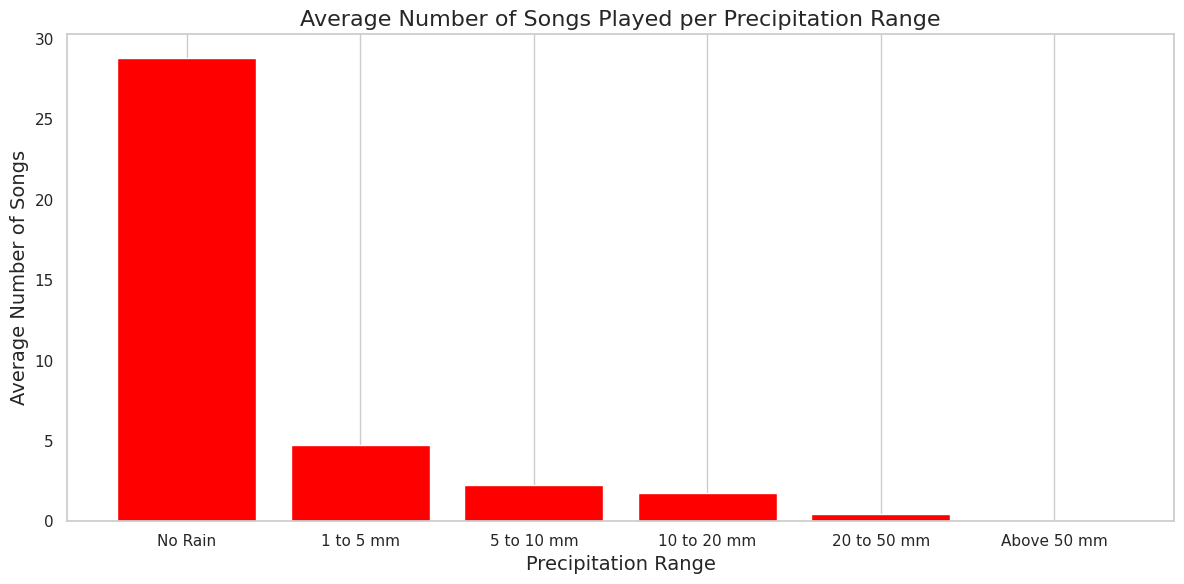

In [176]:
# File with precipitation data
file_name = "spotify_with_avg_precipitation.csv"
merged_data = pd.read_csv(file_name)

# Define custom precipitation bins (adjust these based on your dataset's precipitation range)
bins = [-float('inf'), 1, 5, 10, 20, 50, float('inf')]  # Example bins in mm
labels = ['No Rain', '1 to 5 mm', '5 to 10 mm', '10 to 20 mm', '20 to 50 mm', 'Above 50 mm']  # Labels

# Group data into the bins
merged_data['precip_range'] = pd.cut(merged_data['precipitation'], bins=bins, labels=labels, include_lowest=True)

# Count songs for each precipitation range
precip_grouped = merged_data.groupby('precip_range').size().reset_index(name='num_songs')

# Calculate average number of songs per precipitation range
avg_songs_per_precip = precip_grouped['num_songs'] / len(merged_data['date'].unique())
precip_grouped['avg_songs_per_precip'] = avg_songs_per_precip

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(precip_grouped['precip_range'], precip_grouped['avg_songs_per_precip'], color='red')
plt.title("Average Number of Songs Played by Precipitation", fontsize=16)
plt.xlabel("Precipitation Range", fontsize=14)
plt.ylabel("Average Number of Songs", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Average Streaming Time vs. Precipitation**

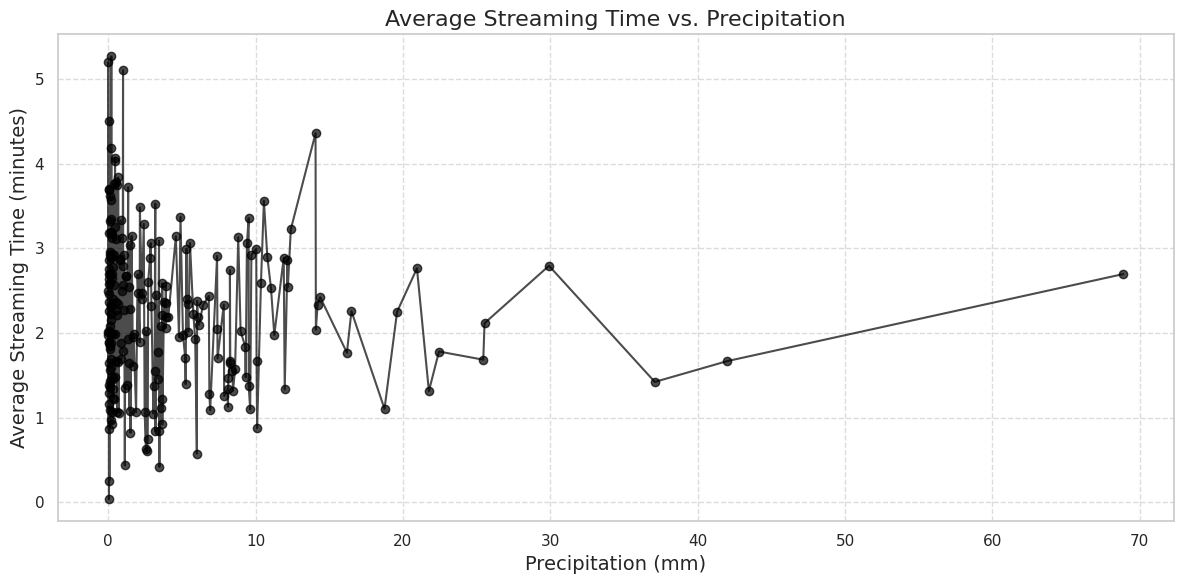

In [184]:
file_name = "spotify_with_avg_precipitation.csv"
merged_data = pd.read_csv(file_name)

# Group by precipitation and calculate the average streaming time
precip_grouped = merged_data.groupby('precipitation').agg(
    avg_streaming_time=('minutes_played', 'mean')  # Calculate the mean of streaming time for each precipitation value
).reset_index()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(precip_grouped['precipitation'], precip_grouped['avg_streaming_time'], color='black', alpha=0.7, linestyle='-', marker='o')
plt.title("Average Streaming Time vs. Precipitation", fontsize=16)
plt.xlabel("Precipitation (mm)", fontsize=14)
plt.ylabel("Average Streaming Time (minutes)", fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Average Streaming Time per Temperature**

<ipython-input-161-9dd9c57e85cc>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_grouped = merged_data.groupby('temp_range')['minutes_played'].sum().reset_index(name='total_streaming_time')


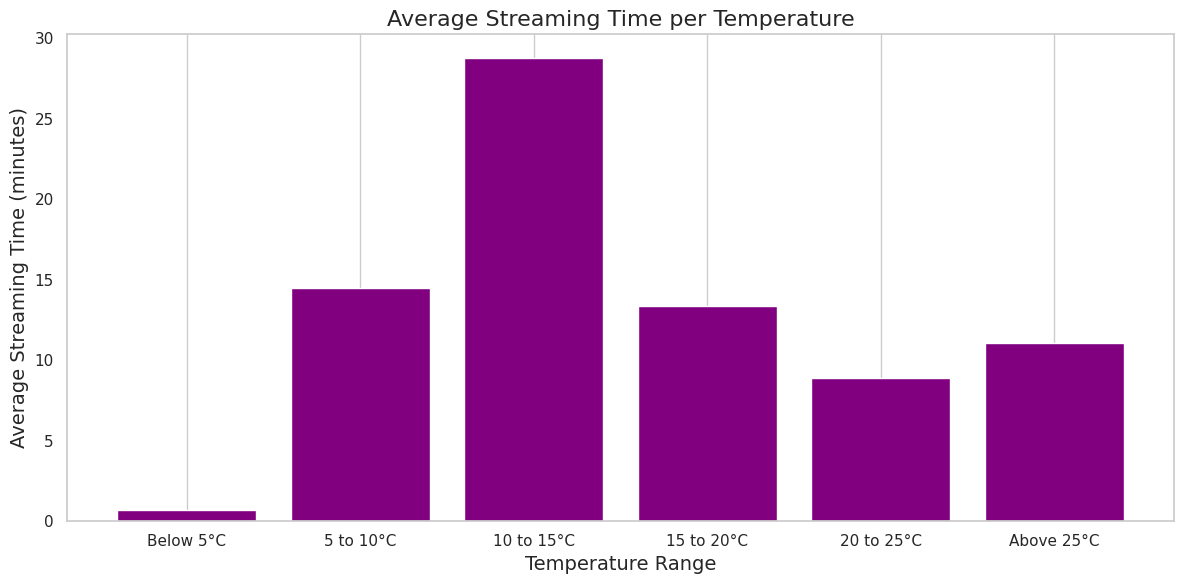

In [161]:
# Load the dataset
file_name = "spotify_with_avg_temperature.csv"
merged_data = pd.read_csv(file_name)

# Define custom temperature bins
bins = [-float('inf'), 5, 10, 15, 20, 25, float('inf')]  # Custom bins
labels = ['Below 5°C', '5 to 10°C', '10 to 15°C', '15 to 20°C', '20 to 25°C', 'Above 25°C']  # Labels

# Group data into the bins
merged_data['temp_range'] = pd.cut(merged_data['avg_temp'], bins=bins, labels=labels, include_lowest=True)

# Calculate total streaming time for each temperature range
temp_grouped = merged_data.groupby('temp_range')['minutes_played'].sum().reset_index(name='total_streaming_time')

# Calculate average streaming time per day for each temperature range
avg_streaming_per_temp = temp_grouped['total_streaming_time'] / len(merged_data['date'].unique())
temp_grouped['avg_streaming_time_per_temp'] = avg_streaming_per_temp

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(temp_grouped['temp_range'], temp_grouped['avg_streaming_time_per_temp'], color='purple')
plt.title("Average Streaming Time per Temperature", fontsize=16)
plt.xlabel("Temperature Range", fontsize=14)
plt.ylabel("Average Streaming Time (minutes)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Average Session Counts Per Day by Temperature**

<ipython-input-159-08375896d7d7>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_range', y='avg_session_count_per_day', data=avg_session_count, palette="coolwarm")


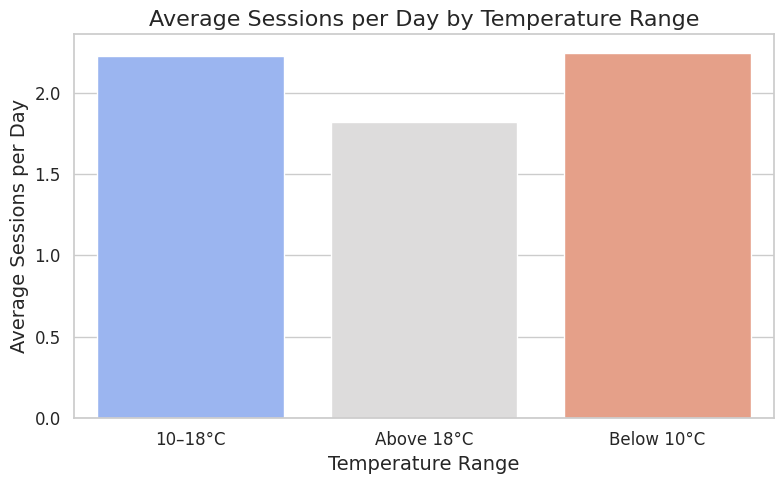

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_name = "spotify_with_avg_temperature.csv"
data = pd.read_csv(file_name)

# Convert 'ts' to datetime and ensure 'date' is datetime as well
data['ts'] = pd.to_datetime(data['ts'])
data['date'] = pd.to_datetime(data['date'])

# Sort data by 'date' and 'ts'
data = data.sort_values(by=['date', 'ts'])

# Define updated temperature ranges
def categorize_temperature(temp):
    if temp < 10:
        return "Below 10°C"
    elif 10 <= temp <= 18:
        return "10–18°C"
    else:
        return "Above 18°C"

data['temp_range'] = data['avg_temp'].apply(categorize_temperature)

# Calculate time differences to define sessions
data['time_diff'] = data.groupby('date')['ts'].diff().dt.total_seconds() / 60  # Difference in minutes
data['new_session'] = (data['time_diff'] > 30) | (data['time_diff'].isna())  # Start new session if gap > 30 min

# Assign session IDs
data['session_id'] = data.groupby(['date'])['new_session'].cumsum()

# Calculate session-level metrics
sessions = data.groupby(['date', 'session_id', 'temp_range']).agg(
    session_duration=('minutes_played', 'sum'),  # Total duration per session
    session_start=('ts', 'min'),
    session_end=('ts', 'max')
).reset_index()

# Group sessions by temperature range and date to calculate daily session counts
daily_session_counts = sessions.groupby(['temp_range', 'date']).size().reset_index(name='session_count')

# Calculate the average session count for each temperature range
avg_session_count = daily_session_counts.groupby('temp_range')['session_count'].mean().reset_index()
avg_session_count.rename(columns={'session_count': 'avg_session_count_per_day'}, inplace=True)

# Plot the results
plt.figure(figsize=(8, 5))
sns.barplot(x='temp_range', y='avg_session_count_per_day', data=avg_session_count, palette="coolwarm")
plt.xlabel('Temperature Range', fontsize=14)
plt.ylabel('Average Sessions per Day', fontsize=14)
plt.title('Average Sessions per Day by Temperature Range', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


**Number of Songs Played by Hour of Day and Temperature Range**

<ipython-input-164-5094f964a321>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_temp_grouped = merged_data.groupby(['hour_of_day', 'temp_range']).size().reset_index(name='num_songs')


<Figure size 1400x800 with 0 Axes>

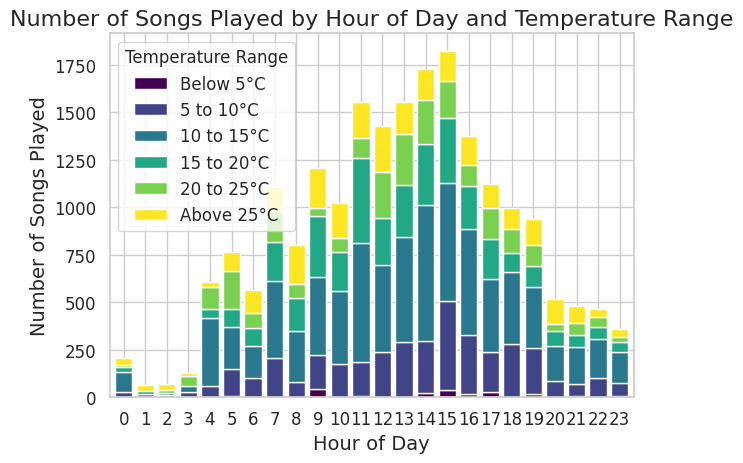

In [164]:
import seaborn as sns

# Load the dataset
file_name = "spotify_with_avg_temperature.csv"
merged_data = pd.read_csv(file_name)

# Convert timestamp to datetime and extract hour of day
merged_data['ts'] = pd.to_datetime(merged_data['ts'])
merged_data['hour_of_day'] = merged_data['ts'].dt.hour

# Define custom temperature bins
bins = [-float('inf'), 5, 10, 15, 20, 25, float('inf')]  # Custom bins
labels = ['Below 5°C', '5 to 10°C', '10 to 15°C', '15 to 20°C', '20 to 25°C', 'Above 25°C']  # Labels

# Group data into temperature bins
merged_data['temp_range'] = pd.cut(merged_data['avg_temp'], bins=bins, labels=labels, include_lowest=True)

# Group by hour of day and temperature range
hour_temp_grouped = merged_data.groupby(['hour_of_day', 'temp_range']).size().reset_index(name='num_songs')

# Pivot the data for easier plotting
hour_temp_pivot = hour_temp_grouped.pivot(index='hour_of_day', columns='temp_range', values='num_songs').fillna(0)

# Plot a stacked bar chart
plt.figure(figsize=(14, 8))
hour_temp_pivot.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

# Add labels and title
plt.title("Number of Songs Played by Hour of Day and Temperature Range", fontsize=16)
plt.xlabel("Hour of Day", fontsize=14)
plt.ylabel("Number of Songs Played", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Temperature Range", fontsize=12)
plt.tight_layout()
plt.show()
